## Import and read Datasets

Pada section ini dilakukan inisialisasi pada datasets yang di import 

In [ ]:
from google.colab import drive
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Vgg16

/content/gdrive/MyDrive/Vgg16


In [ ]:
%ls

 Data_test/    Orange_model.h5  'Salinan jeruk-masak-2.jpeg'
 Data_Train/   predict/         'Salinan Salinan jeruk-masak-2.jpeg'


In [ ]:
data_path_train = "Data_Train/"
data_path_test  = "Data_test/"
data_path_predict   = "predict/"

 - My datasets library : https://drive.google.com/drive/folders/16RIM9Xg8SZdJUudUyVP0W5nISVaAI_QN?usp=sharing

## Import library

melakukan import library untuk modeling dan preprocessing

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## Latih Model

In [ ]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.2
)

In [ ]:
train_ds=gen.flow_from_directory(
    data_path_train,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

validation_ds=gen.flow_from_directory(
    data_path_test,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 250 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Inisialisasi Model

In [ ]:
model = Sequential()

In [ ]:
# Menambahkan blok-blok konvolusi
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Menambahkan layer-layer fully connected
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

## Validasi model

In [ ]:
model.evaluate(validation_ds)

1/1 [==============================] - 12s 12s/step - loss: 0.7138 - accuracy: 0.5000


[0.7137727737426758, 0.5]

In [ ]:
model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // train_ds.batch_size,
    validation_data=validation_ds,
    validation_steps=validation_ds.samples // validation_ds.batch_size,
    epochs=10,
    verbose=1)

Epoch 1/10
7/7 [==============================] - 41s 5s/step - loss: 677.1418 - accuracy: 0.4866
Epoch 2/10
7/7 [==============================] - 27s 4s/step - loss: 1.1363 - accuracy: 0.4911
Epoch 3/10
7/7 [==============================] - 26s 4s/step - loss: 0.6926 - accuracy: 0.5505
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 0.7229 - accuracy: 0.4358
Epoch 5/10
7/7 [==============================] - 26s 4s/step - loss: 0.6808 - accuracy: 0.4908
Epoch 6/10
7/7 [==============================] - 26s 4s/step - loss: 0.7408 - accuracy: 0.5138
Epoch 7/10
7/7 [==============================] - 26s 3s/step - loss: 0.6911 - accuracy: 0.5505
Epoch 8/10
7/7 [==============================] - 26s 3s/step - loss: 0.7085 - accuracy: 0.6376
Epoch 9/10
7/7 [==============================] - 26s 4s/step - loss: 0.7118 - accuracy: 0.4862
Epoch 10/10
7/7 [==============================] - 25s 3s/step - loss: 1.0377 - accuracy: 0.5550


In [ ]:
# show model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

## Save Model

In [ ]:
model.save("Orange_model.h5")

## Uji model v1

- pada uji model berikut tanpa generator untuk predict jdai testnya satu per satu

In [ ]:
# Load the model
model_orange = load_model("Orange_model.h5")

In [ ]:
# Melihat label kelas data dataset
class_names = list(train_ds.class_indices.keys())
class_names

['matang', 'mentah']

1/1 [==============================] - 0s 23ms/step
Prediksi: mentah
Predicted probability: 0.5119918584823608


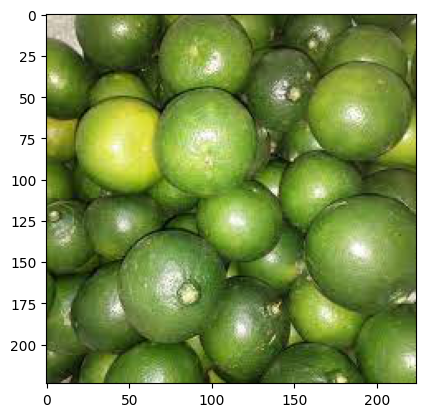

In [ ]:
# Load the image
img_path = "predict/mentah/jeruk-mentah-4.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
plt.imshow(img.astype(np.uint8))

# Preprocess the image
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add the batch dimension

# Make prediction
output = saved_model.predict(img)

# Print the predicted class
predicted_class_idx = np.argmax(output)
predicted_class = class_names[predicted_class_idx]
print(f"Prediksi: {predicted_class}")
print(f"Predicted probability: {output[0][predicted_class_idx]}")

## Uji model v2


- pada uji model berikut menggunakan generator predict jadi karna image yang akan di perlihatkan memiliki rentang range

In [ ]:
IMAGE_SIZE = 224

In [ ]:
predict_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_path_predict,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    class_mode="categorical",
)

Found 20 images belonging to 2 classes.


In [ ]:
def predict(model_orange, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model_orange.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 1)
    print(confidence)
    return predicted_class, confidence

1/1 [==============================] - 0s 150ms/step
[[0.49145994 0.5119934 ]]
51.2
1/1 [==============================] - 0s 23ms/step
[[0.49142483 0.5120326 ]]
51.2
1/1 [==============================] - 0s 23ms/step
[[0.4914793  0.51197207]]
51.2
1/1 [==============================] - 0s 23ms/step
[[0.4914213  0.51203686]]
51.2
1/1 [==============================] - 0s 27ms/step
[[0.49143207 0.5120246 ]]
51.2
1/1 [==============================] - 0s 38ms/step
[[0.49146685 0.51198554]]
51.2


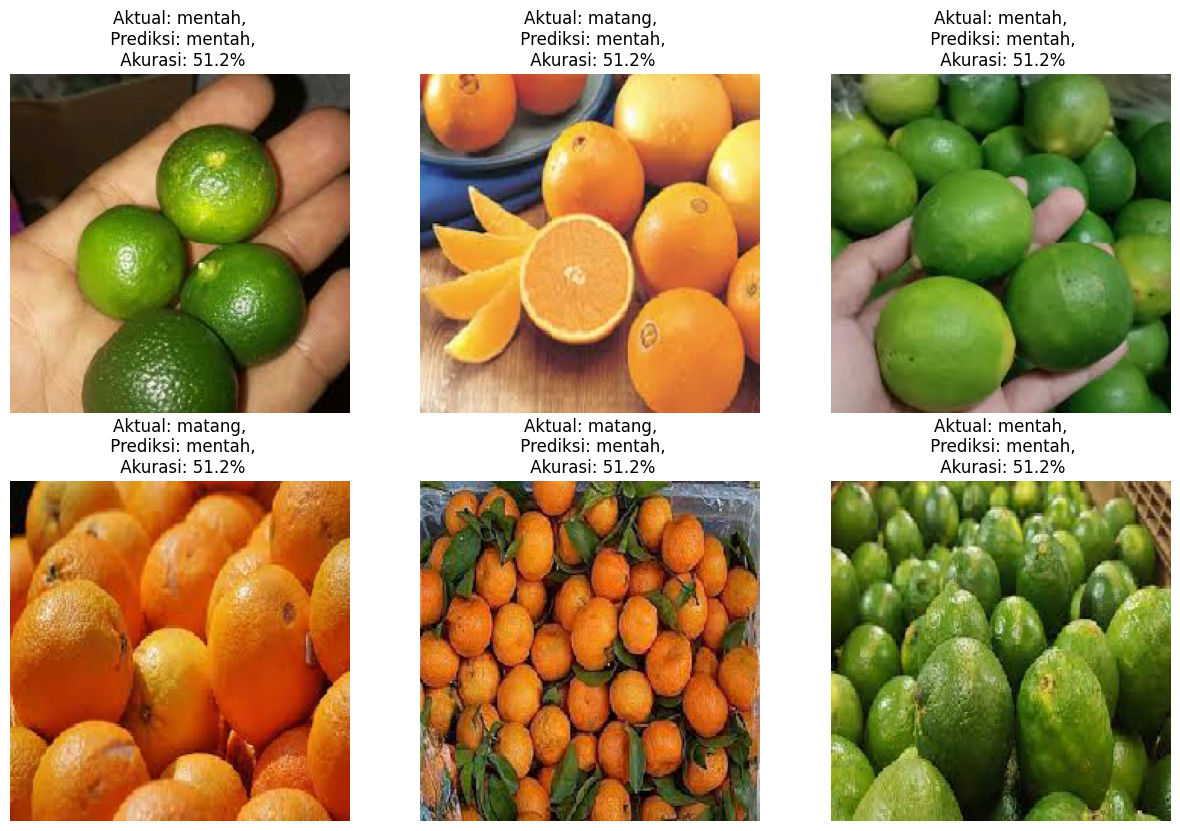

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in predict_gen:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model_orange, images[i])
        actual_class = class_names[int(labels[i][1])] 
        plt.title(f"Aktual: {actual_class},\n Prediksi: {predicted_class},\n Akurasi: {confidence}%")
        plt.axis("off")
    break